In [45]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

import seaborn as sns

In [46]:
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)

In [47]:
df = pd.read_csv("dataset/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [49]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [50]:
df.describe()
# burada px_height min 0 olarak görüldüğünden problemli veri var demek olur. onu düzeltmeliyiz
# kolonların ne ifade ettiğini ve ne değerler alabileceğini bilmemiz lazım çünkü ona göre doğru veri setini hazırlamış oluruz.
# öbür türlü hatalı veriler ile modelimiz iyi bir performans göstermez
# örneğin ekran yüksekliği veya genişliği 0 olamaz, batarya 0 olamaz, fc gibi bazı kolonlar negatif olamaz gibi

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


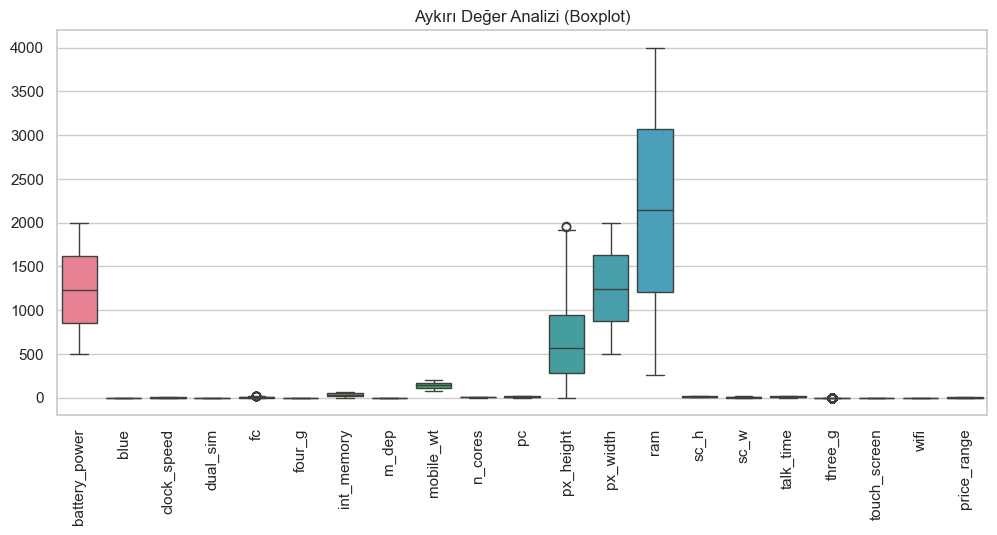

In [51]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.title("Aykırı Değer Analizi (Boxplot)")
plt.xticks(rotation=90)
plt.show()

In [52]:
print("\nSıfır px_height sayısı:", (df["px_height"] == 0).sum())
print("Sıfır px_width sayısı:", (df["px_width"] == 0).sum())


Sıfır px_height sayısı: 2
Sıfır px_width sayısı: 0


In [53]:
# # IQR Analysis
# numeric_cols = df.select_dtypes(include=["int64", "float64"]).columns

# for col in numeric_cols:
#     Q1 = df[col].quantile(0.25)
#     Q3 = df[col].quantile(0.75)
#     IQR = Q3 - Q1

#     lower = Q1 - 1.5 * IQR
#     upper = Q3 + 1.5 * IQR

#     outliers = df[(df[col] < lower) | (df[col] > upper)]

#     print(f"\n--- {col} ---")
#     print(f"IQR: {IQR}")
#     print(f"Lower Bound: {lower}")
#     print(f"Upper Bound: {upper}")
#     print(f"Aykırı değer sayısı: {outliers.shape[0]}")

#     if outliers.shape[0] > 0:
#         print(outliers[[col]].head())

In [54]:
df = df[df["px_height"] != 0]
df = df[df["px_width"] != 0]
# px_height ve px_width sütunlarında fiziksel olarak mümkün olmayan 0 değerleri tespit edilmiştir. 
# Bu değerler ölçüm hatası olarak değerlendirilmiş ve veri bütünlüğünü artırmak amacıyla ilgili satırlar veri setinden kaldırılmıştır.

In [55]:
# 2) Feature Engineering
df["total_pixels"] = df["px_height"] * df["px_width"]
df["screen_area"] = df["sc_h"] * df["sc_w"]
df["ppi"] = np.sqrt(df["px_height"]**2 + df["px_width"]**2) / 5.5

In [ ]:
# 3) Scaling
X = df.drop("price_range", axis=1)
y = df["price_range"]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [57]:
# Veri setinde px_height ve px_width sütunlarında fiziksel olarak mümkün olmayan 0 değerleri tespit edilmiştir. 
# Bu kayıtlar ölçüm hatası olarak değerlendirilmiş ve analiz kalitesini artırmak için veri setinden çıkarılmıştır.

# Temizlik sonrasında Feature Engineering aşamasında telefon ekranı ve donanım özelliklerini daha iyi yansıtan 
# total_pixels, screen_area ve ppi gibi yeni özellikler türetilmiştir. 
# Bu işlem modelin fiyat tahmini performansını artırmak için yapılmıştır.

In [58]:
# FEATURE SELECTION / IMPORTANCE #

In [59]:
from sklearn.feature_selection import SelectKBest, f_classif

X = df.drop("price_range", axis=1)
y = df["price_range"]

selector = SelectKBest(score_func=f_classif, k="all")
selector.fit(X, y)

f_test_scores = pd.Series(selector.scores_, index=X.columns).sort_values(ascending=False)
print("ANOVA F-test Skorları:")
print(f_test_scores)

ANOVA F-test Skorları:
ram              3513.691893
battery_power      31.314986
ppi                27.108147
total_pixels       26.278627
px_width           22.333179
px_height          19.809803
mobile_wt           3.509433
int_memory          2.902810
n_cores             2.728649
screen_area         2.235994
sc_h                2.200485
sc_w                1.742315
talk_time           1.652539
m_dep               1.487114
touch_screen        1.278533
four_g              1.021398
pc                  0.820537
fc                  0.772705
blue                0.515995
clock_speed         0.511466
dual_sim            0.458093
three_g             0.454774
wifi                0.304982
dtype: float64


ANOVA F-test analizi, her bir özelliğin price_range sınıflarını ayırt etme gücünü ölçmek için uygulanmıştır. Sonuçlara göre en yüksek F-skorunu RAM almış ve fiyat aralığını belirlemede açık ara en etkili özellik olduğu görülmüştür. RAM’i battery_power, ppi, total_pixels, px_width ve px_height gibi ekran çözünürlüğü ve batarya kapasitesiyle ilgili değişkenler takip etmektedir. Bu özellikler fiyat üzerinde orta-yüksek düzeyde etkili bulunmuştur.
Buna karşılık dual_sim, three_g, wifi, blue, four_g, touch_screen, pc ve fc gibi ikili veya düşük varyanslı değişkenlerin F-skorları düşük çıkmış ve fiyatı ayırt etmede anlamlı bir katkı sağlamadıkları görülmüştür. Genel olarak ANOVA F-test, modelleme aşamasında öncelikli olarak RAM ve ekran/batarya özelliklerinin dikkate alınması gerektiğini göstermiştir.

In [60]:
from sklearn.feature_selection import mutual_info_classif

X = df.drop("price_range", axis=1)
y = df["price_range"]

mi = mutual_info_classif(X, y)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)

print("Mutual Information Skorları:")
print(mi_scores)

Mutual Information Skorları:
ram              0.848179
screen_area      0.047798
px_height        0.030756
ppi              0.028480
battery_power    0.027546
sc_w             0.025640
px_width         0.025410
four_g           0.019529
mobile_wt        0.018804
three_g          0.018143
total_pixels     0.017726
int_memory       0.011997
wifi             0.010720
talk_time        0.000552
clock_speed      0.000000
dual_sim         0.000000
fc               0.000000
blue             0.000000
pc               0.000000
sc_h             0.000000
m_dep            0.000000
n_cores          0.000000
touch_screen     0.000000
dtype: float64


Mutual Information analizi, hedef değişken (price_range) ile en güçlü ilişkiye sahip değişkenin RAM olduğunu göstermektedir (MI skoru 0.85). Bu skor, RAM’in fiyat tahmininde en belirleyici özellik olduğunu göstermektedir.

RAM’den sonra sc_w, screen_area, battery_power ve ppi değişkenleri görece yüksek MI skorlarına sahiptir. Bu değişkenler cihazın ekran büyüklüğü, batarya kapasitesi ve ekran çözünürlüğü gibi fiyatı doğrudan etkileyen özellikleri temsil eder.

clock_speed, dual_sim, three_g, four_g gibi kategorik veya düşük varyanslı özelliklerin MI skorlarının 0’a yakın olduğu görülmüştür. Bu nedenle bu özelliklerin hedef değişken üzerinde anlamlı bir etkisi olmadığı değerlendirilebilir.

Hem Mutual Information hem de ANOVA F-test sonuçları tutarlı şekilde RAM, çözünürlük (px_width, px_height, ppi, total_pixels) ve battery_power özelliklerinin telefon fiyat aralığı üzerinde en yüksek etkiye sahip özellikler olduğunu göstermektedir. Buna karşılık kategorik ikili özellikler (dual_sim, three_g, wifi, blue) fiyatı anlamlı şekilde ayırt edememektedir.

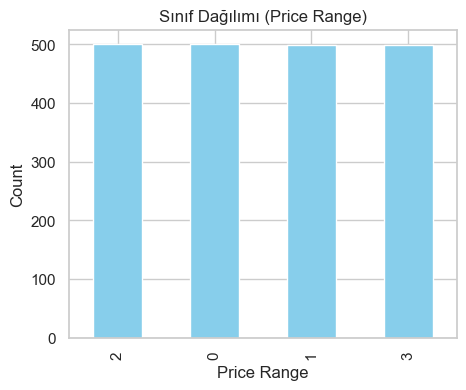

Sınıf dağılımı:
price_range
2    500
0    500
1    499
3    499
Name: count, dtype: int64


In [61]:
plt.figure(figsize=(5,4))
df["price_range"].value_counts().plot(kind="bar", color="skyblue")
plt.title("Sınıf Dağılımı (Price Range)")
plt.xlabel("Price Range")
plt.ylabel("Count")
plt.show()

print("Sınıf dağılımı:")
print(df["price_range"].value_counts())
# Fiyat aralıklarının (price_range) dağılımı incelendiğinde tüm sınıfların (0, 1, 2, 3) eşit sayıda örneğe sahip olduğu görülmüştür. 
# Bu nedenle veri seti dengelidir ve SMOTE gibi bir dengeleme yöntemine ihtiyaç yoktur.

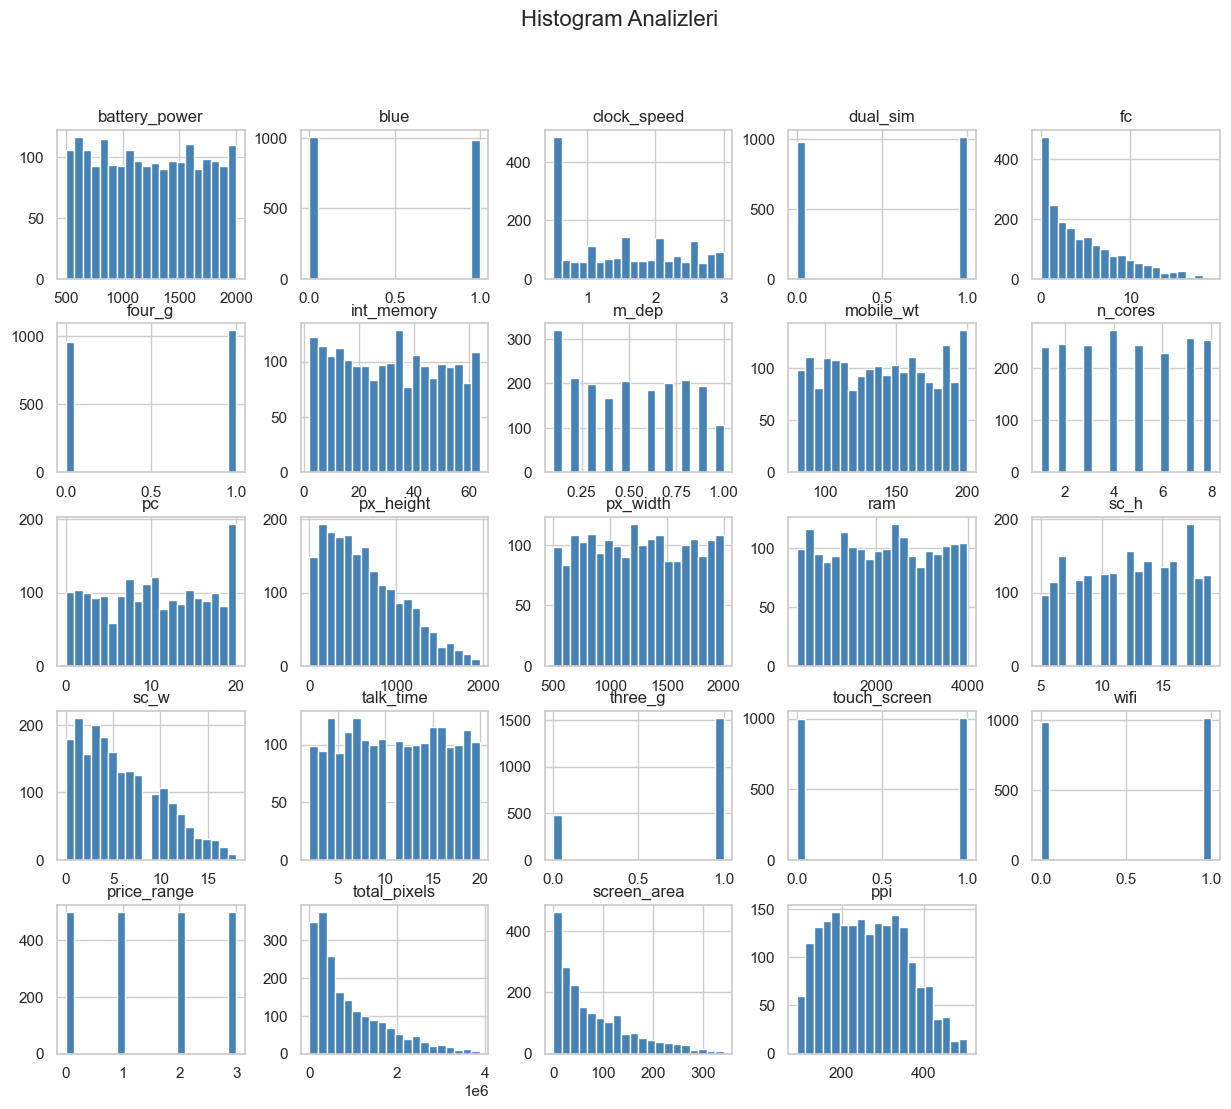

In [62]:
df.hist(figsize=(15,12), bins=20, color='steelblue')
plt.suptitle("Histogram Analizleri", fontsize=16)
plt.show()
# Histogram grafikleri incelendiğinde battery_power ve ram değişkenlerinin geniş aralıklarda dağıldığı, 
# bazı değişkenlerin ise (blue, three_g, touch_screen gibi) kategorik yapıda olduğu görülmüştür.

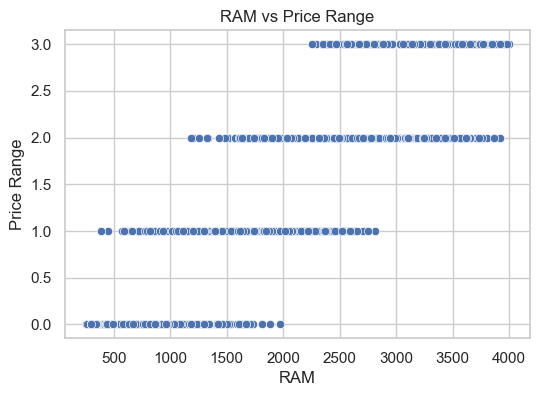

In [63]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["ram"], y=df["price_range"])
plt.title("RAM vs Price Range")
plt.xlabel("RAM")
plt.ylabel("Price Range")
plt.show()
# Scatter plot, RAM’in fiyat aralığı üzerinde güçlü bir etkisi olduğunu göstermektedir. 
# RAM arttıkça price_range sınıflarının üst segmentlere doğru kaydığı gözlemlenmiştir.

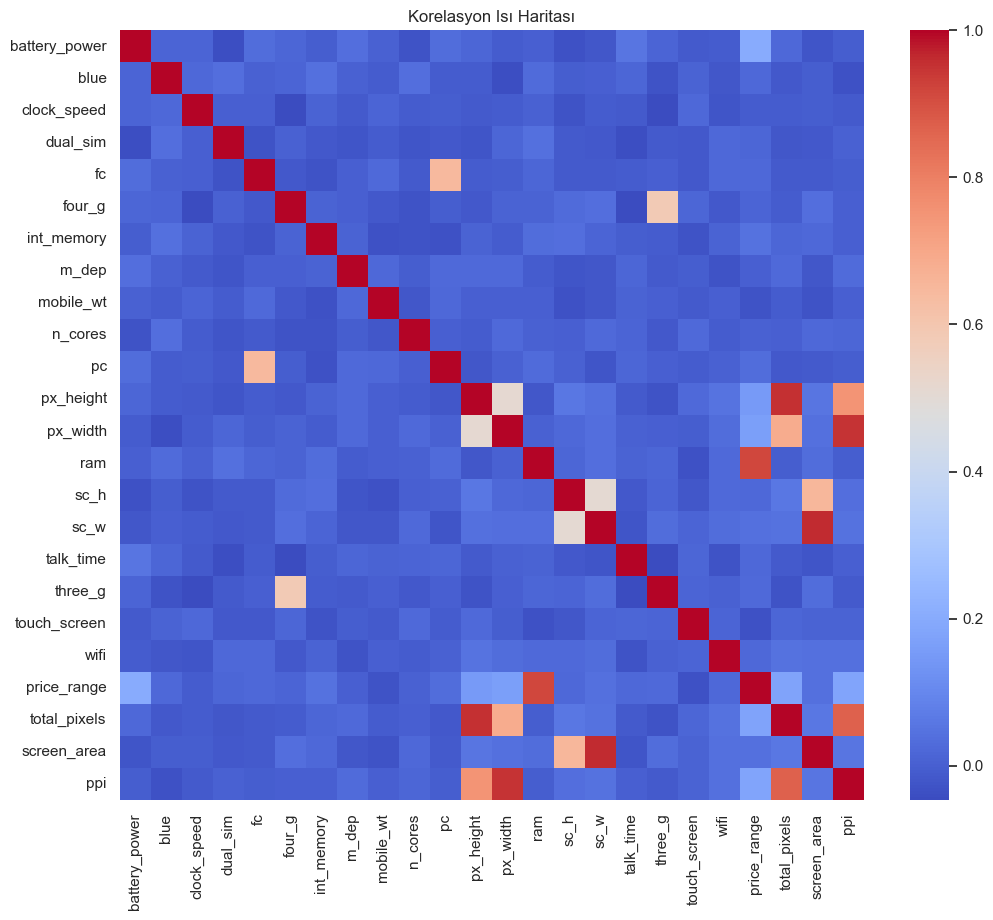

In [64]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), cmap="coolwarm")
plt.title("Korelasyon Isı Haritası")
plt.show()
# Korelasyon haritası, px_height–px_width ve sc_h–sc_w gibi özelliklerin birbirleriyle yüksek düzeyde ilişkili olduğunu göstermiştir.

In [65]:
y.value_counts()

price_range
2    500
0    500
1    499
3    499
Name: count, dtype: int64

In [66]:
# Train/Test Ayırma (Hold-Out)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)